In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

dataset = 'prnn_crabs'

# 1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.

In [33]:
from sklearn.datasets import fetch_openml

data = fetch_openml(dataset)
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Datasets for `Pattern Recognition and Neural Networks' by B.D. Ripley

Cambridge University Press (1996)  ISBN  0-521-46086-7

The background to the datasets is described in section 1.4; this file
relates the computer-readable files to that description.



Cushing's syndrome
------------------

Data from Aitchison & Dunsmore (1975, Tables 11.1-3).

Data file Cushings.dat has four columns,

Label of the patient
Tetrhydrocortisone  (mg/24hr)
Pregnanetriol  (mg/24hr)
Type

The type of the last six patients (u1 to u6) should be
regarded as unknown.  (The code `o' indicates `other').



synthetic two-class problem
---------------------------

Data from Ripley (1994a).

This has two real-valued co-ordinates (xs and ys) and a class (xc)
which is 0 or 1.

Data file  synth.tr   has 250 rows of the training set
synth.te   has 1000 rows of the test set  (not used here)



viruses
-------

This is a dataset on 61 viruses with

FL	frontal lip of carapace (mm)
RW	rear width of carapace (mm)
CL	length along the midline of carapace (mm)
CW	maximum width of carapace (mm)
BD	body depth (mm)

Из описания:

> Leptograpsus crabs
>
>Data from Campbell & Mahon (1974) on the morphology of rock crabs of
>genus Leptograpsus.
>
>There are 50 specimens of each sex of each of two colour forms.

In [34]:
unique_target = data['target'].unique()
unique_target

['blue_form', 'orange_form']
Categories (2, object): ['blue_form', 'orange_form']

Решается задача бинарной классификации

# 2. (1 балл) Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [35]:
X = data['data']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     200 non-null    category
 1   index   200 non-null    int64   
 2   FL      200 non-null    float64 
 3   RW      200 non-null    float64 
 4   CL      200 non-null    float64 
 5   CW      200 non-null    float64 
 6   BD      200 non-null    float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 9.8 KB


In [36]:
X.describe()

,index,FL,RW,CL,CW,BD
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


In [37]:
y = data['target']
[y[y == y.unique()[i]].size/y.size for i in range(len(y.unique()))]

[0.5, 0.5]

Дисбаланс классов отсутствует

# 3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [38]:
X.dtypes

sex      category
index       int64
FL        float64
RW        float64
CL        float64
CW        float64
BD        float64
dtype: object

`sex`- нечисленный признак. Обработаем его с помощью `sklearn.preprocessing.LabelEncoder`:

In [39]:
from sklearn.preprocessing import LabelEncoder

X.loc[:,'sex'] = LabelEncoder().fit_transform(X.loc[:,'sex'])
display(X.dtypes)
X

sex        int32
index      int64
FL       float64
RW       float64
CL       float64
CW       float64
BD       float64
dtype: object

,sex,index,FL,RW,CL,CW,BD
0,1,1,8.1,6.7,16.1,19.0,7.0
1,1,2,8.8,7.7,18.1,20.8,7.4
2,1,3,9.2,7.8,19.0,22.4,7.7
3,1,4,9.6,7.9,20.1,23.1,8.2
4,1,5,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...,...
195,0,46,21.4,18.0,41.2,46.2,18.7
196,0,47,21.7,17.1,41.7,47.2,19.6
197,0,48,21.9,17.2,42.6,47.4,19.5
198,0,49,22.5,17.2,43.0,48.7,19.8


Смысла в столбце `index` нету - он обозначает номер группы. Это поле можно исключить

In [40]:
X = X.drop('index', axis=1)
X

,sex,FL,RW,CL,CW,BD
0,1,8.1,6.7,16.1,19.0,7.0
1,1,8.8,7.7,18.1,20.8,7.4
2,1,9.2,7.8,19.0,22.4,7.7
3,1,9.6,7.9,20.1,23.1,8.2
4,1,9.8,8.0,20.3,23.0,8.2
...,...,...,...,...,...,...
195,0,21.4,18.0,41.2,46.2,18.7
196,0,21.7,17.1,41.7,47.2,19.6
197,0,21.9,17.2,42.6,47.4,19.5
198,0,22.5,17.2,43.0,48.7,19.8


Матрица корреляций


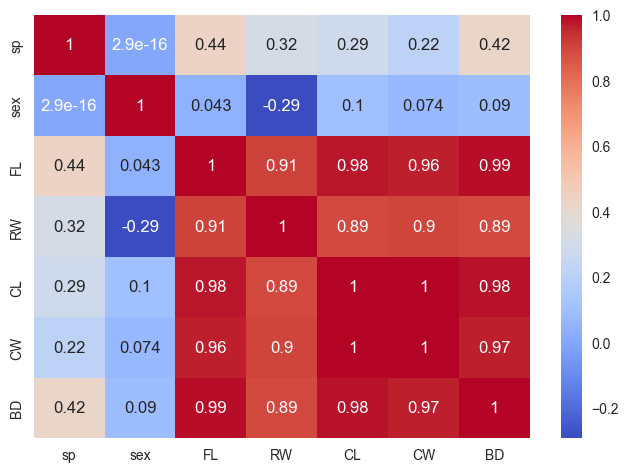

In [41]:
import seaborn as sns

fr = data['frame']
fr['sp'] = LabelEncoder().fit_transform(fr['sp'])
fr['sex'] = LabelEncoder().fit_transform(fr['sex'])
fr.drop('index', axis=1,inplace=True)
sns.heatmap(fr.corr(),xticklabels=True, yticklabels=True,annot=True, cmap='coolwarm')
plt.show()

Матрица частных корреляций:


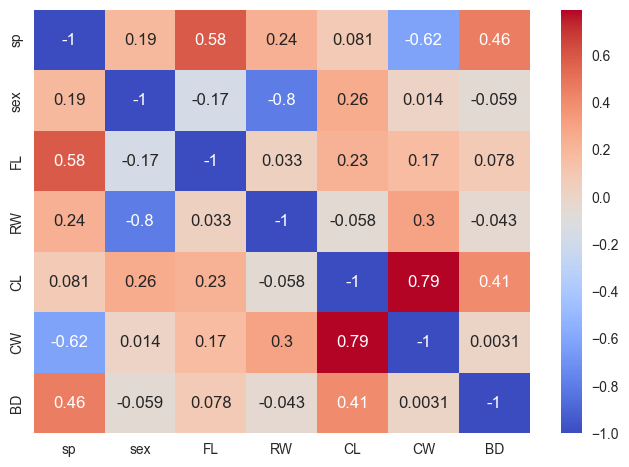

In [61]:
import numpy as np
import pandas as pd

# Шаг 1: Вычисляем корреляционную матрицу
corr_matrix = fr.corr()

# Шаг 2: Инвертируем корреляционную матрицу
inv_corr_matrix = np.linalg.inv(corr_matrix)

# Шаг 3: Вычисляем матрицу частных корреляций
n = inv_corr_matrix.shape[0]
partial_corr_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        partial_corr_matrix[i, j] = -inv_corr_matrix[i, j] / np.sqrt(inv_corr_matrix[i, i] * inv_corr_matrix[j, j])

# Преобразуем в DataFrame для наглядности
partial_corr_df = pd.DataFrame(
    partial_corr_matrix,
    index=corr_matrix.index,
    columns=corr_matrix.columns
)

print("Матрица частных корреляций:")
sns.heatmap(partial_corr_df,xticklabels=True, yticklabels=True,annot=True, cmap='coolwarm')
plt.show()

In [42]:
'''data['target'] = LabelEncoder().fit_transform(data['target'])
data['target']'''

"data['target'] = LabelEncoder().fit_transform(data['target'])\ndata['target']"

# 4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = LogisticRegression().fit(X_train,y_train)


print(f'Train score: {model.score(X_train,y_train)}\nTest score: {model.score(X_test, y_test)}')

Train score: 1.0
Test score: 1.0


В методе `score()` подсчитывается метрика accuracy

# 5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель. 

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

train_predicts = model.predict(X_train)
test_predicts = model.predict(X_test)

LE = []
for _ in [y_train,train_predicts,y_test,test_predicts]:
    LE.append(LabelEncoder().fit_transform(_))

for i in [precision_score, recall_score, f1_score]:
    print(f'Train {i.__name__}: {i(*LE[0:2])}\nTest {i.__name__}: {i(*LE[2:4])}\n')

Train precision_score: 1.0
Test precision_score: 1.0

Train recall_score: 1.0
Test recall_score: 1.0

Train f1_score: 1.0
Test f1_score: 1.0



In [45]:
print(classification_report(LE[2], LE[3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели. 

Оптимальный порог (ROC, G-mean): 0.849 (TPR=1.000, FPR=0.000, G-mean=1.000)


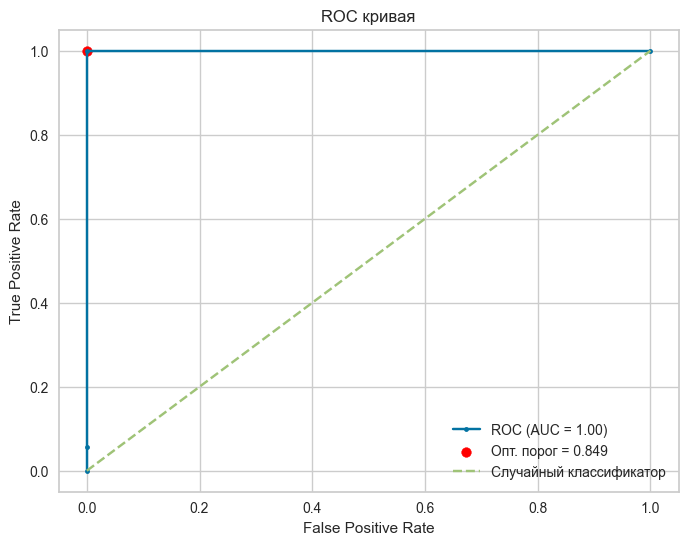

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = LogisticRegression(max_iter=10000).fit(X_train,y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC кривая и ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Вычисляем G-mean: √(TPR * (1 - FPR))
gmean = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmean)
optimal_threshold = thresholds[ix]
print(f'Оптимальный порог (ROC, G-mean): {optimal_threshold:.3f} '
      f'(TPR={tpr[ix]:.3f}, FPR={fpr[ix]:.3f}, G-mean={gmean[ix]:.3f})')

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC (AUC = {roc_auc:.2f})')
plt.scatter(fpr[ix], tpr[ix], color='red', label=f'Опт. порог = {optimal_threshold:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend()
plt.show()

# 7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели. 

Оптимальный порог при β=0.5 (преимущество precision): 0.849, F0.5-score = 1.000
Оптимальный порог при β=2.0 (преимущество recall): 0.849, F2.0-score = 1.000


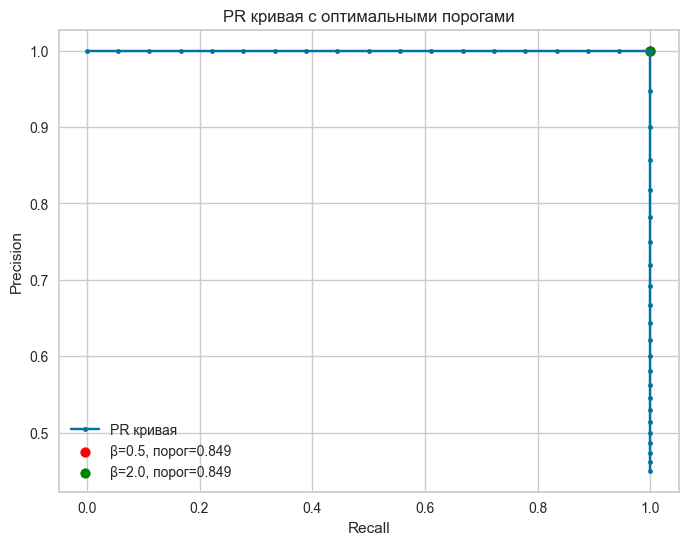

Отчет классификации (преимущество precision):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Отчет классификации (преимущество recall):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [47]:
from sklearn.metrics import precision_recall_curve

# Вычисляем PR-кривую
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
# Обратите внимание: thresholds_pr имеет длину на 1 меньше, чем precision и recall
thresholds_pr = thresholds_pr

# Функция для вычисления Fβ-меры
def fbeta(prec, rec, beta):
    return (1 + beta**2) * (prec * rec) / ((beta**2 * prec) + rec + 1e-8)

# Вычисляем Fβ для beta=0.5 (преимущество precision) и beta=2 (преимущество recall)
beta1 = 0.5
beta2 = 2.0

f_beta1 = fbeta(precision[:-1], recall[:-1], beta1)
f_beta2 = fbeta(precision[:-1], recall[:-1], beta2)

ix_beta1 = np.argmax(f_beta1)
ix_beta2 = np.argmax(f_beta2)

optimal_threshold_beta1 = thresholds_pr[ix_beta1]
optimal_threshold_beta2 = thresholds_pr[ix_beta2]

print(f'Оптимальный порог при β={beta1} (преимущество precision): {optimal_threshold_beta1:.3f}, F{beta1}-score = {f_beta1[ix_beta1]:.3f}')
print(f'Оптимальный порог при β={beta2} (преимущество recall): {optimal_threshold_beta2:.3f}, F{beta2}-score = {f_beta2[ix_beta2]:.3f}')

# Визуализация PR-кривой с отмеченными оптимальными порогами
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='PR кривая')
plt.scatter(recall[ix_beta1], precision[ix_beta1], color='red', label=f'β={beta1}, порог={optimal_threshold_beta1:.3f}')
plt.scatter(recall[ix_beta2], precision[ix_beta2], color='green', label=f'β={beta2}, порог={optimal_threshold_beta2:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR кривая с оптимальными порогами')
plt.legend()
plt.show()

# Оценка моделей с оптимизированными порогами
y_pred_beta1 = (y_pred_proba >= optimal_threshold_beta1).astype(int)
y_pred_beta2 = (y_pred_proba >= optimal_threshold_beta2).astype(int)

from sklearn.metrics import classification_report
print("Отчет классификации (преимущество precision):")
print(classification_report(y_test, y_pred_beta1))
print("Отчет классификации (преимущество recall):")
print(classification_report(y_test, y_pred_beta2))

# 8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных. 

In [48]:
from sklearn.model_selection import cross_validate

model_lr = LogisticRegression(solver='liblinear')
scoring = ['accuracy', 'precision', 'recall', 'f1']
folds = 5
print(f'Колличество данных в каждом фолде: {int(y.size/folds)}')


cv_results = cross_validate(model_lr, X, y, cv=folds, scoring=scoring, return_train_score=True)

print("Результаты cross_validate для Logistic Regression:")
for key in cv_results:
    print(f"{key}: {cv_results[key]}")

Колличество данных в каждом фолде: 40
Результаты cross_validate для Logistic Regression:
fit_time: [0.00199366 0.00199366 0.00099993 0.00099707 0.00199318]
score_time: [0.00398588 0.00299597 0.00298929 0.00398755 0.00398731]
test_accuracy: [1. 1. 1. 1. 1.]
train_accuracy: [1. 1. 1. 1. 1.]
test_precision: [1. 1. 1. 1. 1.]
train_precision: [1. 1. 1. 1. 1.]
test_recall: [1. 1. 1. 1. 1.]
train_recall: [1. 1. 1. 1. 1.]
test_f1: [1. 1. 1. 1. 1.]
train_f1: [1. 1. 1. 1. 1.]


Больше фолдов смысла брать нет - выборка становится все менее репрезентативной

Возьмем модель `K-nn` (`sklearn.neighbors.KNeighborsClassifier`)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1']
folds = 3
print(f'Колличество данных в каждом фолде: {int(y.size/folds)}')


cv_results = cross_validate(model_knn, X, y, cv=folds, scoring=scoring)#, return_train_score=True)

print("Результаты cross_validate для Logistic Regression:")
for key in cv_results:
    print(f"{key}: {cv_results[key]}")

Колличество данных в каждом фолде: 66
Результаты cross_validate для Logistic Regression:
fit_time: [0.0009973  0.00099635 0.00099635]
score_time: [0.00797272 0.0059793  0.00599051]
test_accuracy: [0.8358209  0.6119403  0.83333333]
test_precision: [1.         0.61111111 0.76190476]
test_recall: [0.66666667 0.64705882 0.96969697]
test_f1: [0.8        0.62857143 0.85333333]


# 9. (2 балл) Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели. 

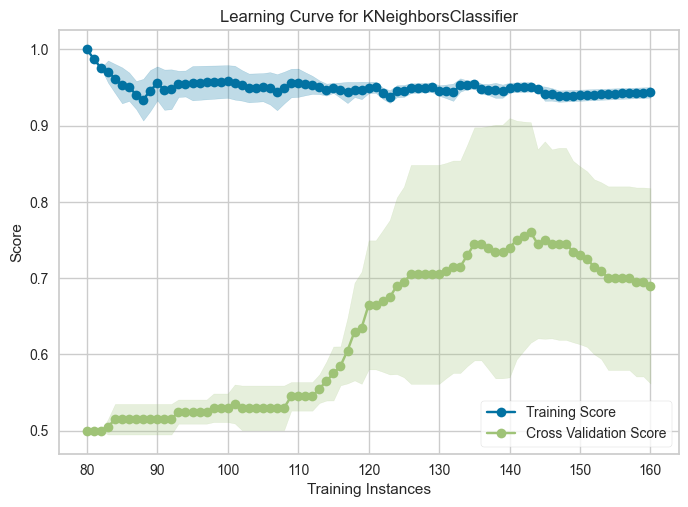

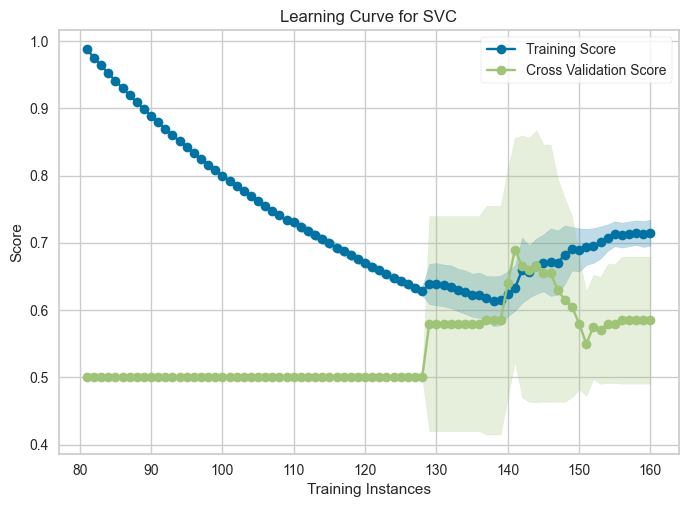

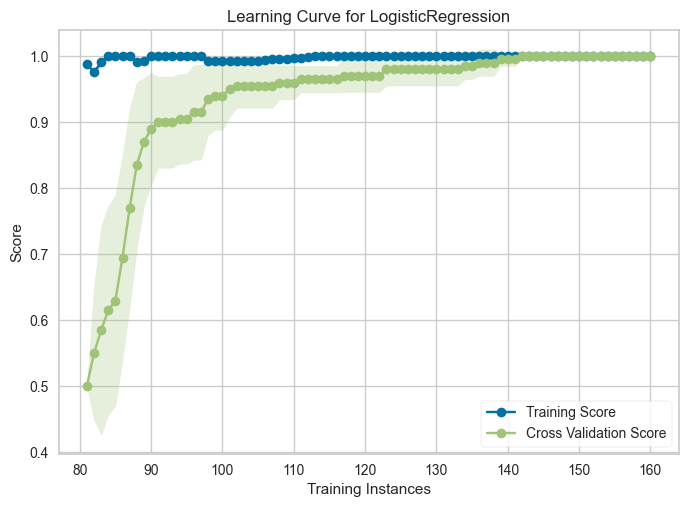

In [50]:
from yellowbrick.model_selection import LearningCurve
from sklearn.svm import SVC

#
visualizer = LearningCurve(
    KNeighborsClassifier(), train_sizes=np.linspace(0.5, 1.0, 100)
).fit(X, y).show()

visualizer = LearningCurve(
    SVC(), train_sizes=np.linspace(0.5, 1.0, 100)
).fit(X, y).show()

visualizer = LearningCurve(
    LogisticRegression(solver='liblinear'), train_sizes=np.linspace(0.5, 1.0, 100)
).fit(X, y).show()

Переобучение: `KNeighborsClassifier` <br>
Недообучение: `SVC`<br>
Качественное обучение: `LogisticRegression`

# 10. (2 балл) Исследуйте как любой из гиперпараметров модели влияет на эффективность модели. 

n_neighbors=1: Train Accuracy=1.0000, Test Accuracy=0.9750
n_neighbors=2: Train Accuracy=0.9875, Test Accuracy=0.9250
n_neighbors=3: Train Accuracy=0.9812, Test Accuracy=0.9000
n_neighbors=4: Train Accuracy=0.9437, Test Accuracy=0.8750
n_neighbors=5: Train Accuracy=0.9500, Test Accuracy=0.9000
n_neighbors=6: Train Accuracy=0.9250, Test Accuracy=0.9250
n_neighbors=7: Train Accuracy=0.9375, Test Accuracy=0.8750
n_neighbors=8: Train Accuracy=0.9000, Test Accuracy=0.9250
n_neighbors=9: Train Accuracy=0.8938, Test Accuracy=0.8750
n_neighbors=10: Train Accuracy=0.8812, Test Accuracy=0.9500
n_neighbors=11: Train Accuracy=0.8750, Test Accuracy=0.8500
n_neighbors=12: Train Accuracy=0.8562, Test Accuracy=0.8750
n_neighbors=13: Train Accuracy=0.8500, Test Accuracy=0.8500
n_neighbors=14: Train Accuracy=0.8187, Test Accuracy=0.8750
n_neighbors=15: Train Accuracy=0.8313, Test Accuracy=0.8500
n_neighbors=16: Train Accuracy=0.8125, Test Accuracy=0.8500
n_neighbors=17: Train Accuracy=0.8313, Test Accur

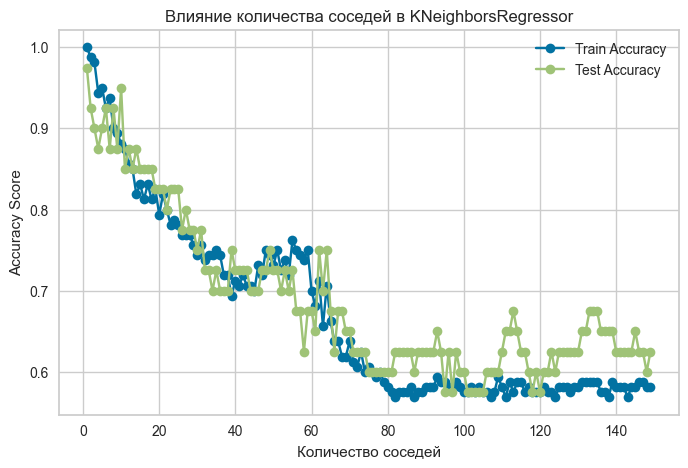

In [51]:
from sklearn.metrics import accuracy_score

neighbors = range(1,150)
train_scores_knn = []
test_scores_knn = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_scores_knn.append(accuracy_score(y_train, knn.predict(X_train)))
    test_scores_knn.append(accuracy_score(y_test, knn.predict(X_test)))
    print(f"n_neighbors={n}: Train Accuracy={train_scores_knn[-1]:.4f}, Test Accuracy={test_scores_knn[-1]:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(neighbors, train_scores_knn, label='Train Accuracy', marker='o')
plt.plot(neighbors, test_scores_knn, label='Test Accuracy', marker='o')
plt.xlabel("Количество соседей")
plt.ylabel("Accuracy Score")
plt.title("Влияние количества соседей в KNeighborsRegressor")
plt.legend()
plt.show()

C=0.1: Train R2=0.6000, Test R2=0.6500
C=1: Train R2=0.7125, Test R2=0.7000
C=10: Train R2=1.0000, Test R2=0.9750
C=100: Train R2=1.0000, Test R2=1.0000
C=1000.0: Train R2=1.0000, Test R2=1.0000


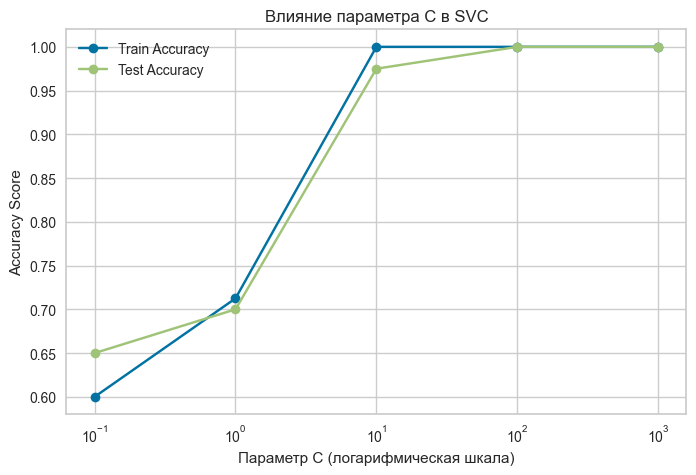

In [52]:
C_values = [0.1, 1, 10, 100, 1e3]
train_scores = []
test_scores = []

for C in C_values:
    svr = SVC(C=C, kernel='rbf')
    svr.fit(X_train, y_train)
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))
    print(f"C={C}: Train R2={train_scores[-1]:.4f}, Test R2={test_scores[-1]:.4f}")

# Построение графика зависимости R^2 от параметра C
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(C_values, test_scores, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel("Параметр C (логарифмическая шкала)")
plt.ylabel("Accuracy Score")
plt.title("Влияние параметра C в SVC")
plt.legend()
plt.show()